In [2]:
!pip install dask[dataframe]
!pip install tensorflow-addons

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import mode
from sklearn.metrics import roc_curve, auc

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Reshape, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Input
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [7]:
from tensorflow.keras.losses import BinaryFocalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [8]:
import keras

In [9]:
##check for cuda
tf.test.gpu_device_name()
#change to cuda
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found. Running on CPU instead.')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
final_data_df = pd.read_csv('/content/drive/MyDrive/UMD/1st Sem/DATA602_DATA_Science/Project/FinalNN/FinalData/ultimate_op_dataset.csv')

#1.  Display the first few rows, general info, and summary statistics for initial analysis

In [11]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 178 entries, SK_ID_CURR to DEQ_AVG_COUNT_DPD0P_3MOB_ALL
dtypes: float64(120), int64(42), object(16)
memory usage: 417.6+ MB


In [12]:
final_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,b_720_AMT_CREDIT_MAX_OVERDUE_sum,b_consumer_DAYS_CREDIT_ENDDATE_mean,b_credit_AMT_CREDIT_SUM_DEBT_sum,b_CNT_CREDIT_PROLONG_sum,b_365_AMT_CREDIT_SUM_OVERDUE_sum,b_credit_AMT_CREDIT_DEBT_DIFF_mean,b_credit_DAYS_CREDIT_mean,b_active_DAYS_CREDIT_mean,DEQ_AVG_COUNT_DPD0P_36MOB_ALL,DEQ_AVG_COUNT_DPD0P_3MOB_ALL
0,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,NaN,-1437.666667,0.0,0.0,NaN,-54000.0,-1960.00,NaN,0.0,0.0
1,100023,0,Cash loans,F,N,Y,1,90000.0,544491.0,17563.5,...,NaN,-264.333333,41881.5,0.0,0.0,-47236.5,-1275.25,-1141.25,0.0,0.0
2,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,NaN,-462.000000,NaN,0.0,NaN,NaN,NaN,-889.00,0.0,0.0
3,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,...,NaN,-2453.000000,0.0,0.0,NaN,-306000.0,-1169.00,NaN,0.0,0.0
4,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,13518.675,701.666667,692253.0,0.0,NaN,62253.0,-956.00,-857.00,0.0,0.0


In [13]:
final_data_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,b_720_AMT_CREDIT_MAX_OVERDUE_sum,b_consumer_DAYS_CREDIT_ENDDATE_mean,b_credit_AMT_CREDIT_SUM_DEBT_sum,b_CNT_CREDIT_PROLONG_sum,b_365_AMT_CREDIT_SUM_OVERDUE_sum,b_credit_AMT_CREDIT_DEBT_DIFF_mean,b_credit_DAYS_CREDIT_mean,b_active_DAYS_CREDIT_mean,DEQ_AVG_COUNT_DPD0P_36MOB_ALL,DEQ_AVG_COUNT_DPD0P_3MOB_ALL
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,120475.000000,246121.000000,1.610710e+05,263491.000000,151762.000000,1.610710e+05,172042.000000,217150.000000,263491.000000,263491.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,2695.902720,-491.340273,1.471226e+05,0.040476,61.055884,-9.288312e+04,-954.066972,-650.789789,0.156694,0.045224
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,11154.850891,809.410368,2.699828e+05,0.247169,2825.282742,1.612642e+05,629.450834,495.737551,0.996231,0.230291
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,-22316.500000,-6.981558e+06,0.000000,0.000000,-3.463279e+07,-2922.000000,-2922.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,-977.750000,0.000000e+00,0.000000,0.000000,-1.337634e+05,-1297.093750,-871.500000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,-488.466667,5.057996e+04,0.000000,0.000000,-5.499450e+04,-837.500000,-537.309524,0.000000,0.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,-12.000000,2.074095e+05,0.000000,0.000000,-1.086750e+04,-472.000000,-294.425000,0.000000,0.000000


# 2. Feature Engineering

## 2.1. Handle Missing Values
#### Drop columns with more than 50% missing values

In [14]:
final_data_df.shape

(307511, 178)

In [15]:
missing_threshold = 0.5
missing_data = final_data_df.isnull().mean()
columns_to_drop = missing_data[missing_data > missing_threshold].index
final_data_df = final_data_df.drop(columns=columns_to_drop)

In [16]:
len(columns_to_drop)

55

In [17]:
final_data_df.shape

(307511, 123)

#### Impute missing values for numeric columns with median and categorical with

---

mode

In [18]:

#make full thing visible
pd.set_option('display.max_rows', 200)
print(final_data_df.isnull().sum())

SK_ID_CURR                                           0
TARGET                                               0
NAME_CONTRACT_TYPE                                   0
CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                         12
AMT_GOODS_PRICE                                    278
NAME_TYPE_SUITE                                   1292
NAME_INCOME_TYPE                                     0
NAME_EDUCATION_TYPE                                  0
NAME_FAMILY_STATUS                                   0
NAME_HOUSING_TYPE                                    0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLO


    Replaces NaN values:
    - For numerical columns: Based on the column's minimum value.
      - If min value is 0, replace NaN with 10 - 1 = 9.
      - If min value is negative, replace NaN with the nearest power of 10 + 1.
    - For categorical columns: Replace NaN with "UNK".

    Parameters:
    data (pd.DataFrame): Input DataFrame.

    Returns:
    pd.DataFrame: DataFrame with NaN values replaced.


In [19]:
def handle_nan(data):

    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            # Numerical column
            min_val = data[column].min(skipna=True)

            if min_val == 0:
                replacement_value = - 1
            elif min_val < 0:
                nearest_negative_power = -10 ** (np.ceil(np.log10(abs(min_val)))+0)
                replacement_value = nearest_negative_power*10 + 1
            else:
                # If min_val > 0 (unexpected), fallback to a default replacement
                replacement_value = -10  # Default for unforeseen cases

            # Replace NaN with the calculated replacement value
            # data[column].fillna(replacement_value, inplace=True)
            data[column] = data[column].fillna(replacement_value)
        elif data[column].dtype == 'object':
            # Categorical column: Replace NaN with "UNK"
            # data[column].fillna("UNK", inplace=True)
            data[column] = data[column].fillna("UNK")
    return data

# Apply the function to your dataset
final_data_df = handle_nan(final_data_df)

# Validate the changes
print("Missing Values After Handling:")
print(final_data_df.isnull().sum())

Missing Values After Handling:
SK_ID_CURR                                      0
TARGET                                          0
NAME_CONTRACT_TYPE                              0
CODE_GENDER                                     0
FLAG_OWN_CAR                                    0
FLAG_OWN_REALTY                                 0
CNT_CHILDREN                                    0
AMT_INCOME_TOTAL                                0
AMT_CREDIT                                      0
AMT_ANNUITY                                     0
AMT_GOODS_PRICE                                 0
NAME_TYPE_SUITE                                 0
NAME_INCOME_TYPE                                0
NAME_EDUCATION_TYPE                             0
NAME_FAMILY_STATUS                              0
NAME_HOUSING_TYPE                               0
REGION_POPULATION_RELATIVE                      0
DAYS_BIRTH                                      0
DAYS_EMPLOYED                                   0
DAYS_REGISTRATION  

In [20]:
final_data_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,b_DAYS_CREDIT_mean,b_720_DAYS_CREDIT_PLAN_sum,b_consumer_DAYS_CREDIT_ENDDATE_mean,b_credit_AMT_CREDIT_SUM_DEBT_sum,b_CNT_CREDIT_PROLONG_sum,b_credit_AMT_CREDIT_DEBT_DIFF_mean,b_credit_DAYS_CREDIT_mean,b_active_DAYS_CREDIT_mean,DEQ_AVG_COUNT_DPD0P_36MOB_ALL,DEQ_AVG_COUNT_DPD0P_3MOB_ALL
0,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,-1773.000000,-999999.0,-1437.666667,0.0,0.0,-54000.0,-1960.00,-99999.00,0.0,0.0
1,100023,0,Cash loans,F,N,Y,1,90000.0,544491.0,17563.5,...,-1164.384615,3652.0,-264.333333,41881.5,0.0,-47236.5,-1275.25,-1141.25,0.0,0.0
2,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,-889.000000,-999999.0,-462.000000,-99999999.0,0.0,-999999999.0,-99999.00,-889.00,0.0,0.0
3,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,...,-1904.000000,-999999.0,-2453.000000,0.0,0.0,-306000.0,-1169.00,-99999.00,0.0,0.0
4,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-1104.800000,2557.0,701.666667,692253.0,0.0,62253.0,-956.00,-857.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,454943,0,Cash loans,F,N,Y,0,135000.0,539100.0,22086.0,...,-99999.000000,-999999.0,-999999.000000,-99999999.0,-1.0,-999999999.0,-99999.00,-99999.00,-1.0,-1.0
307507,455003,0,Cash loans,F,N,Y,1,103500.0,353241.0,35068.5,...,-99999.000000,-999999.0,-999999.000000,-99999999.0,-1.0,-999999999.0,-99999.00,-99999.00,-1.0,-1.0
307508,455116,0,Cash loans,F,N,Y,0,45000.0,119925.0,11988.0,...,-99999.000000,-999999.0,-999999.000000,-99999999.0,-1.0,-999999999.0,-99999.00,-99999.00,-1.0,-1.0
307509,455159,0,Revolving loans,M,N,N,0,202500.0,900000.0,45000.0,...,-99999.000000,-999999.0,-999999.000000,-99999999.0,-1.0,-999999999.0,-99999.00,-99999.00,-1.0,-1.0


## 2.2. Handle Outliers
#### Cap outliers at 1st and 99th percentiles for numeric columns

In [21]:
# 2. Handle Outliers
# Cap outliers at 1st and 99th percentiles for numeric columns
numeric_cols = final_data_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    lower_bound = final_data_df[col].quantile(0.05)
    upper_bound = final_data_df[col].quantile(0.95)
    final_data_df[col] = np.clip(final_data_df[col], lower_bound, upper_bound)
final_data_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,b_DAYS_CREDIT_mean,b_720_DAYS_CREDIT_PLAN_sum,b_consumer_DAYS_CREDIT_ENDDATE_mean,b_credit_AMT_CREDIT_SUM_DEBT_sum,b_CNT_CREDIT_PROLONG_sum,b_credit_AMT_CREDIT_DEBT_DIFF_mean,b_credit_DAYS_CREDIT_mean,b_active_DAYS_CREDIT_mean,DEQ_AVG_COUNT_DPD0P_36MOB_ALL,DEQ_AVG_COUNT_DPD0P_3MOB_ALL
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,307511.000000,3.075110e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278183.072462,0.080729,NaN,NaN,NaN,NaN,0.400509,163167.915380,5.846019e+05,26598.793372,...,-15247.987454,-336709.799864,-200052.930561,-4.755879e+07,-0.143149,-4.762598e+08,-44591.207384,-29846.247700,-0.100255,-0.133198
std,101331.601166,0.272419,NaN,NaN,NaN,NaN,0.664724,72517.568752,3.563103e+05,12481.993515,...,34644.575222,476031.173670,399518.102108,5.000294e+07,0.350226,4.993877e+08,49169.245572,45255.788575,0.393721,0.356365
min,117945.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,67500.000000,1.350000e+05,9000.000000,...,-99999.000000,-999999.000000,-999999.000000,-1.000000e+08,-1.000000,-1.000000e+09,-99999.000000,-99999.000000,-1.000000,-1.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,112500.000000,2.700000e+05,16524.000000,...,-1719.477273,-999999.000000,-1687.000000,-1.000000e+08,0.000000,-1.000000e+09,-99999.000000,-99999.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,147150.000000,5.135310e+05,24903.000000,...,-1171.250000,730.000000,-720.333333,0.000000e+00,0.000000,-3.331350e+05,-1791.750000,-801.666667,0.000000,0.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,202500.000000,8.086500e+05,34596.000000,...,-734.633333,2424.000000,-136.571429,6.300000e+04,0.000000,-4.912992e+04,-757.000000,-390.000000,0.000000,0.000000


## 2.3. Convert Data Types
#### Convert binary categorical variables (e.g., FLAG_OWN_CAR) to 0/1

In [22]:
binary_map = {'Y': 1, 'N': 0}
binary_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']  # Add other binary columns if applicable
for col in binary_cols:
    if col in final_data_df.columns:
        final_data_df[col] = final_data_df[col].map(binary_map)

# Convert other categorical variables into one-hot encoding
categorical_cols = final_data_df.select_dtypes(include=['object']).columns
final_data_df = pd.get_dummies(final_data_df, columns=categorical_cols, drop_first=True)

## 2.4. Scale Numeric Variables
#### Use StandardScaler for features like income, credit, etc.

In [23]:
#get residual and probablity column and add to exclude list
prob_data_col_name = [col for col in final_data_df.columns if 'prob' in col or 'Probability' in col]
res_data_col_name = [col for col in final_data_df.columns if 'residual' in col]

In [24]:
#get numerical features
numeric_cols = final_data_df.select_dtypes(include=['float64', 'int64']).columns

In [25]:
len(numeric_cols)

112

In [26]:
numeric_cols = numeric_cols.difference(['TARGET', 'SK_ID_CURR']) # Exclude these columns
numeric_cols = numeric_cols.difference(prob_data_col_name)
numeric_cols = numeric_cols.difference(res_data_col_name)
numeric_cols

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'vin_avg_time_between_loans_min',
       'vin_days_since_credit_update_min_max',
       'vin_days_since_first_loan_taken_max_sum',
       'vin_days_since_last_document_update_max',
       'vin_last_loan_cash_loans_loan_sum',
       'vin_last_loan_consumer_loans_loan_sum',
       'vin_months_since_last_approved_max_sum', 'vin_num_active_loans_sum',
       'vin_total_loan_amount_consumer_loans_min_sum',
       'vin_total_loan_amount_xna_std_sum'],
      dtype='object', length=102)

In [27]:
scaler = StandardScaler()
# for col in numeric_cols:
#     if col in final_data_df.columns:
#         final_data_df[col] = scaler.fit_transform(final_data_df[[col]])
# final_data_df.describe(include='all')


scaled_numeric_data = pd.DataFrame(
    scaler.fit_transform(final_data_df[numeric_cols]),
    columns=numeric_cols,
    index=final_data_df.index
)
remainder_data = final_data_df.drop(columns=numeric_cols)
final_data_df = pd.concat([scaled_numeric_data, remainder_data], axis=1)
final_data_df.describe(include='all')


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_UNK,EMERGENCYSTATE_MODE_Yes
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,306880,299680,307310,305307,306324,302113,306184,252137,161756,305183
mean,-5.402242e-17,4.477992e-17,3.068511e-17,-2.195094e-16,-1.878076e-16,-1.878076e-16,-3.660031e-17,-6.210961e-17,-1.878076e-16,3.844881e-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.409937e+00,-1.261829e+00,-1.188593e+00,-1.319240e+00,-2.531109e+00,-2.531109e+00,-1.912958e+00,-1.605835e+00,-2.531109e+00,-1.360678e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-8.071475e-01,-8.829451e-01,-8.754227e-01,-6.986996e-01,3.950837e-01,3.950837e-01,-1.383378e-02,-1.241621e-01,3.950837e-01,-7.988704e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-1.358594e-01,-1.994638e-01,-2.354655e-01,-2.208836e-01,3.950837e-01,3.950837e-01,-1.383378e-02,-1.241621e-01,3.950837e-01,-2.370632e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.407005e-01,6.288016e-01,4.589562e-01,5.423810e-01,3.950837e-01,3.950837e-01,-1.383378e-02,-1.241621e-01,3.950837e-01,8.865512e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#make all column detail visible
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [29]:
#get only describe for skidcurr traget prob and residual column

final_data_df.describe(include='all')

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,...,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_UNK,EMERGENCYSTATE_MODE_Yes
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,...,307511,307511,307511,307511,307511
unique,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,...,302113,306184,252137,161756,305183
mean,-5.402242e-17,4.477992e-17,3.068511e-17,-2.195094e-16,-1.878076e-16,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
min,-1.409937e+00,-1.261829e+00,-1.188593e+00,-1.319240e+00,-2.531109e+00,...,NaN,NaN,NaN,NaN,NaN
25%,-8.071475e-01,-8.829451e-01,-8.754227e-01,-6.986996e-01,3.950837e-01,...,NaN,NaN,NaN,NaN,NaN
50%,-1.358594e-01,-1.994638e-01,-2.354655e-01,-2.208836e-01,3.950837e-01,...,NaN,NaN,NaN,NaN,NaN
75%,6.407005e-01,6.288016e-01,4.589562e-01,5.423810e-01,3.950837e-01,...,NaN,NaN,NaN,NaN,NaN


## 2.5. Remove Redundant Features
#### Check correlations and drop highly correlated columns

In [30]:
# #plot correlation
# correlation_matrix = final_data_df.corr()
# high_corr_vars = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1.0)].stack().index
# redundant_features = set([col[1] for col in high_corr_vars])
# final_data_df_select = final_data_df.drop(columns=list(redundant_features), errors='ignore')

Original Dataset Shape: (307511, 226)
Reduced Dataset Shape: (307511, 190)


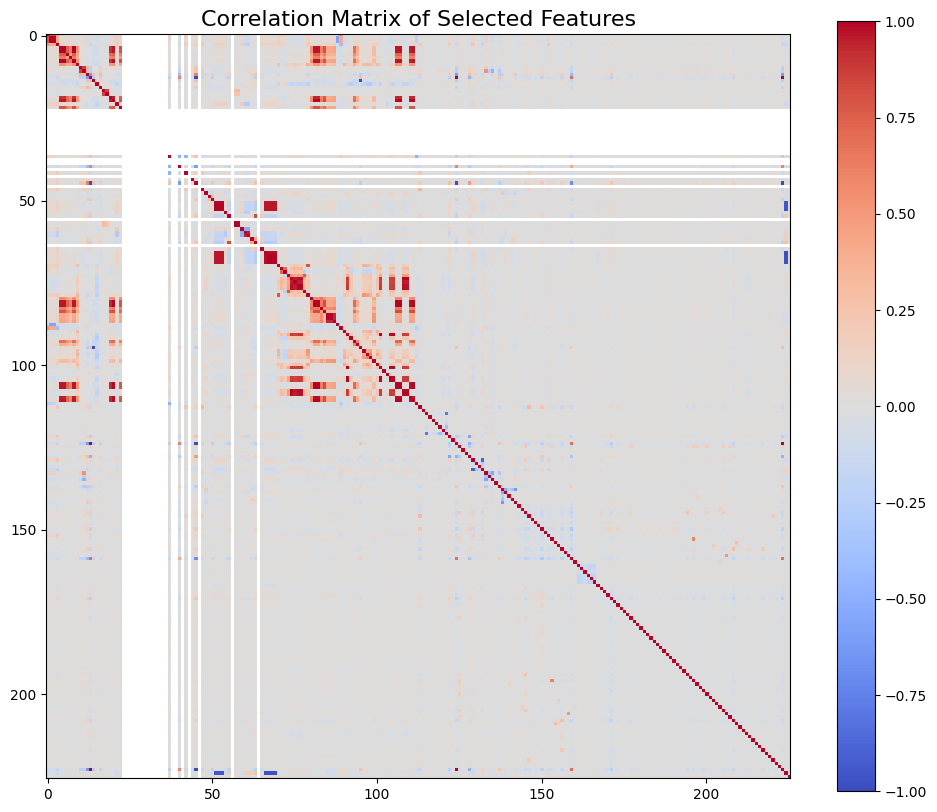

In [31]:


# Compute the correlation matrix
correlation_matrix = final_data_df.corr()

# Identify highly correlated variables (correlation > 0.9)
high_corr_vars = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1.0)].stack().index

# Extract the second column (potentially redundant features)
redundant_features = set([col[1] for col in high_corr_vars])

# Define columns to protect (like "residual" and "prob")
# protected_features = [col for col in final_data_df.columns if 'residual' in col or 'prob' in col]
protected_features = [col for col in final_data_df.columns if 'residual' in col]
# Remove only redundant features that are NOT protected
features_to_drop = [col for col in redundant_features if col not in protected_features or 'prob' in col]

# Drop the redundant features from the dataset
final_data_df_select = final_data_df.drop(columns=features_to_drop, errors='ignore')

# Validate the shape of the new dataset
print(f"Original Dataset Shape: {final_data_df.shape}")
print(f"Reduced Dataset Shape: {final_data_df_select.shape}")

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix of Selected Features", fontsize=16)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.show()


In [32]:
features_to_drop

['FLOORSMAX_MODE',
 'Prediction_Probability',
 'NAME_INCOME_TYPE_Pensioner',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'b_CNT_CREDIT_PROLONG_sum',
 'REGION_RATING_CLIENT_W_CITY',
 'b_credit_AMT_CREDIT_DEBT_DIFF_mean',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE_XNA',
 'vin_total_loan_amount_xna_std_sum',
 'FLOORSMAX_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'TOTALAREA_MODE',
 'pred_proba_bur',
 'Prediction_Probability_pos_cash',
 'amtf_deferral_proportion_avg',
 'AMT_CREDIT',
 'b_DAYS_CREDIT_mean',
 'b_credit_DAYS_CREDIT_mean',
 'DEQ_AVG_COUNT_DPD0P_36MOB_ALL',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_GOODS_PRICE',
 'b_credit_AMT_CREDIT_SUM_DEBT_sum',
 'vin_avg_rejections_last_3_months_sum',
 'amtf_min_days_early_min',
 'pred_proba_prev',
 'DAYS_EMPLOYED',
 'DEQ_AVG_COUNT_DPD0P_3MOB_ALL',
 'amtf_max_days_early_max',
 'amtf_future_installment_ratio_avg',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'YEARS_B

[link text](https://)# 3. Model Training

In [33]:
# Splitting the data
X = final_data_df_select.drop(columns=['TARGET', 'SK_ID_CURR'])  # Features
y = final_data_df_select['TARGET']  # Target
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56539
           1       1.00      0.77      0.87      4964

    accuracy                           0.98     61503
   macro avg       0.99      0.88      0.93     61503
weighted avg       0.98      0.98      0.98     61503

AUC-ROC: 0.9631073900640831


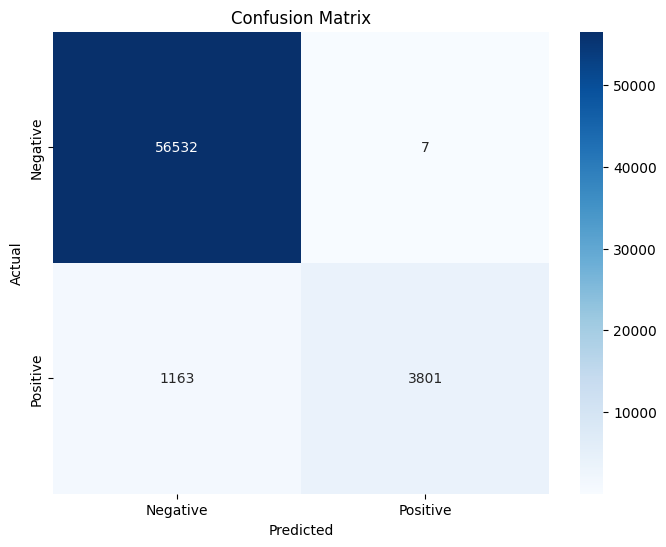

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
@keras.saving.register_keras_serializable()
class CustomMetric(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metric', beta=1.0, **kwargs):
        super(CustomMetric, self).__init__(name=name, **kwargs)
        self.beta = beta
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_rounded = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred_rounded, sample_weight)
        self.recall.update_state(y_true, y_pred_rounded, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        beta_squared = self.beta ** 2
        f1_score = (1 + beta_squared) * (precision_result * recall_result) / \
                   (precision_result + beta_squared * recall_result + 1e-7)
        return f1_score

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


# Neural Network Classifier
class NeuralNetworkClassifier:
    def __init__(self, input_dim, y_train):
        self.class_weights = self.calculate_class_weights(y_train)
        self.model = self.build_model(input_dim)

    @staticmethod
    def calculate_class_weights(y_train):
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        return {i: w for i, w in enumerate(class_weights)}

    def build_model(self, input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32, beta=1.0):

        # Convert y_train and y_test to NumPy arrays for compatibility
        if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
            y_train = y_train.values.flatten()
        if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
            y_test = y_test.values.flatten()
        # Compile the model
        focal_loss = BinaryFocalCrossentropy(alpha=0.3, gamma=2.0)
        custom_metric = CustomMetric(beta=beta)

        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=focal_loss,
            metrics=['accuracy', custom_metric]
        )

        # Callbacks
        # early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        # model_checkpoint = ModelCheckpoint(
        #     'best_model.h5', save_best_only=True, monitor='val_loss', mode='min'
        # )
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(
            'best_model.keras', save_best_only=True, monitor='val_loss', mode='min'  # Changed file extension to .keras
        )
        # Train the model
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            class_weight=self.class_weights,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )

        # Evaluate the model
        test_loss, test_accuracy, custom_metric_value = self.model.evaluate(X_test, y_test, verbose=0)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Custom Metric (F1): {custom_metric_value:.4f}")

        # Predict probabilities
        y_pred_proba = self.model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"ROC-AUC Score: {roc_auc:.4f}")

        # Confusion Matrix
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

        # Loss vs Epoch Plot
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss vs Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return y_pred_proba


# Example usage:
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
# y_pred_proba = nn_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50, batch_size=32, beta=1.5)


Epoch 1/50
7688/7688 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8886 - custom_metric: 0.6163 - loss: 0.0666 - val_accuracy: 0.9991 - val_custom_metric: 0.9946 - val_loss: 0.0034
Epoch 2/50
7688/7688 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9965 - custom_metric: 0.9783 - loss: 0.0082 - val_accuracy: 0.9992 - val_custom_metric: 0.9951 - val_loss: 0.0014
Epoch 3/50
7688/7688 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9977 - custom_metric: 0.9856 - loss: 0.0071 - val_accuracy: 0.9993 - val_custom_metric: 0.9956 - val_loss: 0.0015
Epoch 4/50
7688/7688 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9974 - custom_metric: 0.9841 - loss: 0.0059 - val_accuracy: 0.9992 - val_custom_metric: 0.9948 - val_loss: 0.0024
Epoch 5/50
7688/7688 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9973 - custom_metric: 0.9833 - loss: 0.0083 - val_accuracy: 0.9993 - val_custom_metric: 0.9953 - val_loss: 0.0025
Epoch 6/50
7688/7688 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9978 - custom_me

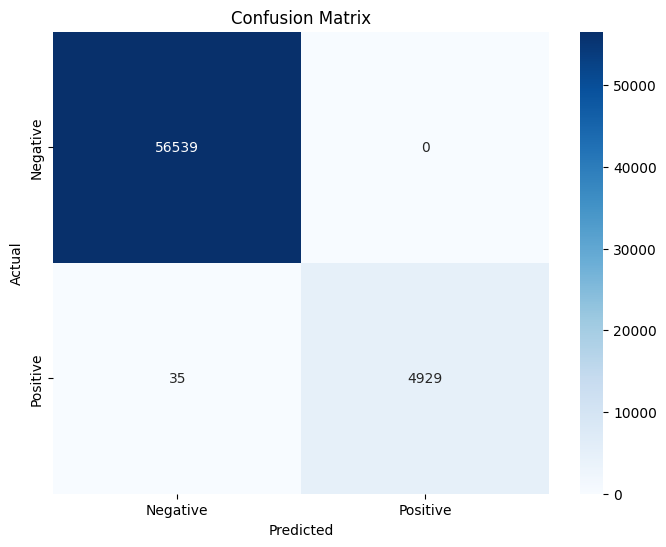

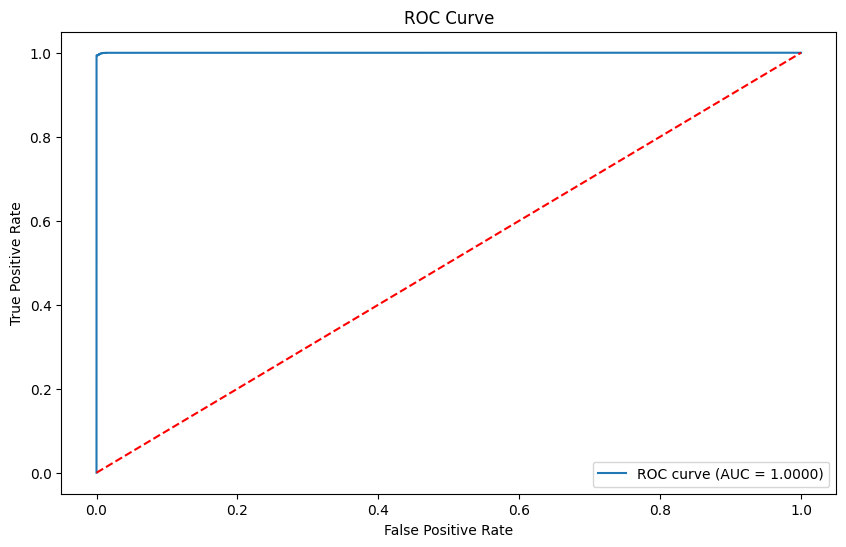

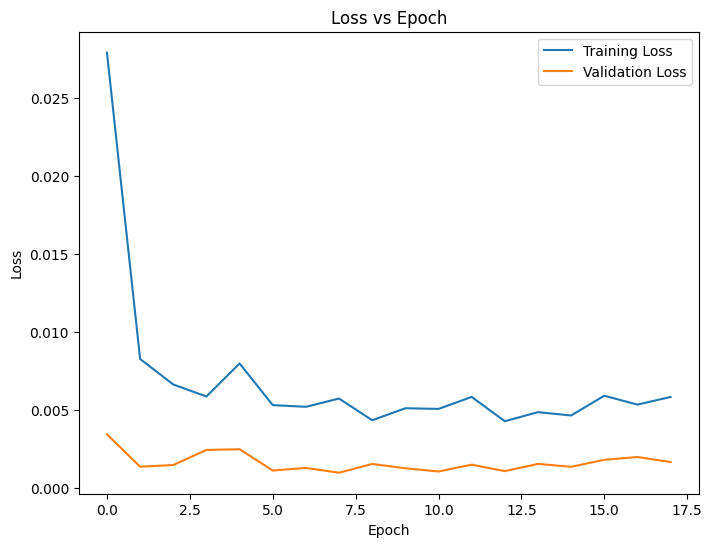

In [36]:
input_dim = X_train.shape[1]
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50)

In [37]:
final_data_df_select['TARGET']

,TARGET
0,0
1,0
2,0
3,0
4,1
...,...
307506,0
307507,0
307508,0
307509,0


In [38]:
pred_proba = logreg.predict_proba(X_test)[:, 1]
pred_proba

array([7.24117714e-03, 4.52342420e-02, 8.10559043e-03, ...,
       4.99364969e-02, 8.86917880e-13, 2.61316817e-02])

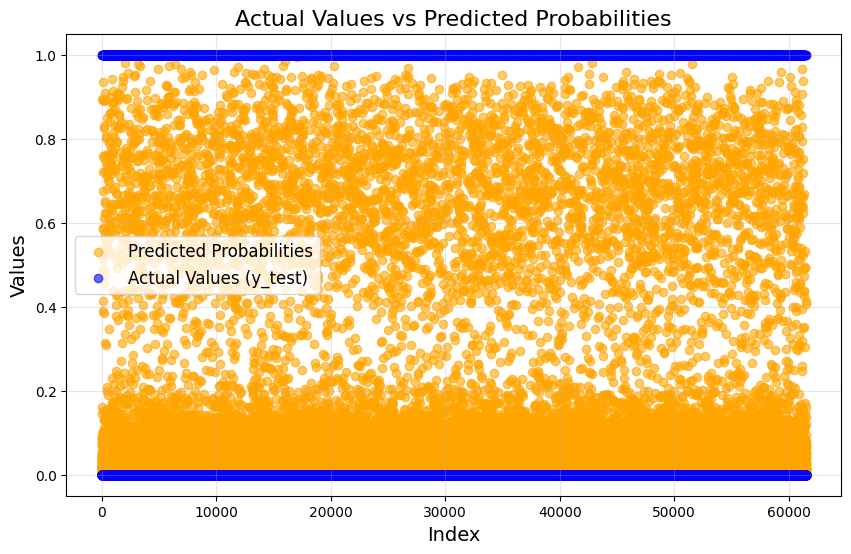

In [39]:
plt.figure(figsize=(10, 6))

plt.scatter(np.arange(len(y_test)), pred_proba, color='orange', alpha=0.6, label='Predicted Probabilities')
plt.scatter(np.arange(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Values (y_test)')

# Plot settings
plt.title('Actual Values vs Predicted Probabilities', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

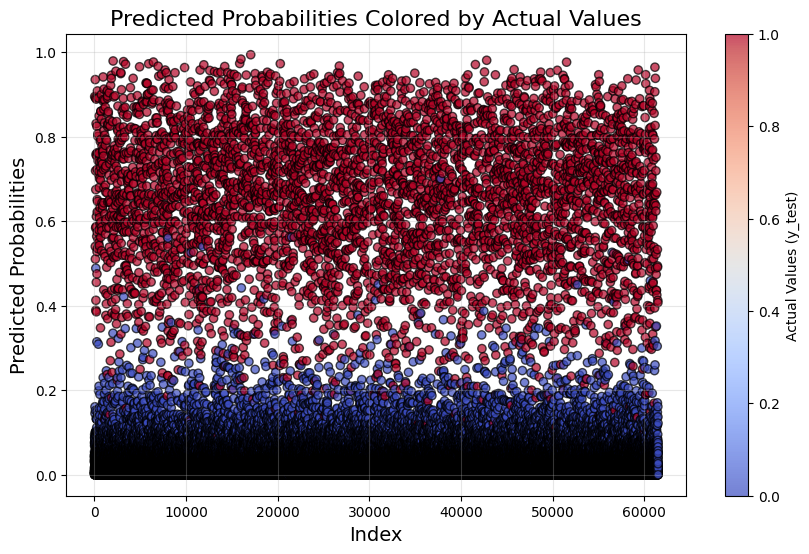

In [40]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    np.arange(len(pred_proba)),  # Use the index as x-axis
    pred_proba,                 # Use predicted probabilities as y-axis
    c=y_test,                   # Color points by the actual values
    cmap='coolwarm',            # Color map (red/blue for binary classification)
    alpha=0.7,                  # Transparency
    # edgecolor='k'               # Add a black border to points for better visibility
)

# Add colorbar for clarity
plt.colorbar(scatter, label='Actual Values (y_test)')

# Plot settings
plt.title('Predicted Probabilities Colored by Actual Values', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Predicted Probabilities', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [41]:
# Sort the predicted probabilities and corresponding y_test
sorted_indices = np.argsort(pred_proba)
sorted_indices

array([23608, 24813, 59160, ..., 42797, 15985, 17049])

In [42]:
# # Sort the predicted probabilities and corresponding y_test
# sorted_indices = np.argsort(pred_proba)
sorted_pred_proba = pred_proba[sorted_indices]
sorted_y_test = y_test.iloc[sorted_indices] # Use iloc for positional indexing

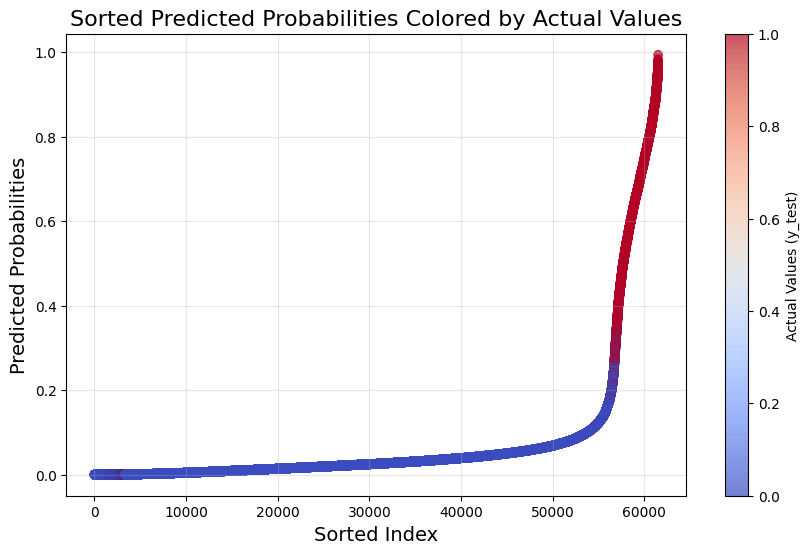

In [43]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    np.arange(len(sorted_pred_proba)),  # Use the index of sorted predictions as x-axis
    sorted_pred_proba,                 # Use sorted predicted probabilities as y-axis
    c=sorted_y_test,                   # Color points based on the sorted actual values
    cmap='coolwarm',                   # Color map (red/blue for binary classification)
    alpha=0.7,                         # Transparency
    # edgecolor='k'                      # Add a black border to points for better visibility
)

# Add colorbar for clarity
plt.colorbar(scatter, label='Actual Values (y_test)')

# Plot settings
plt.title('Sorted Predicted Probabilities Colored by Actual Values', fontsize=16)
plt.xlabel('Sorted Index', fontsize=14)
plt.ylabel('Predicted Probabilities', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [44]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [45]:
feature_importance_df

,Feature,Importance
72,residual_prev,0.325154
73,residual_bur,0.213106
74,residual_posh_cash,0.209208
75,residual,0.200834
13,EXT_SOURCE_2,0.005205
...,...,...
25,FLAG_DOCUMENT_19,0.000000
27,FLAG_DOCUMENT_20,0.000000
26,FLAG_DOCUMENT_2,0.000000
177,ORGANIZATION_TYPE_Trade: type 4,0.000000


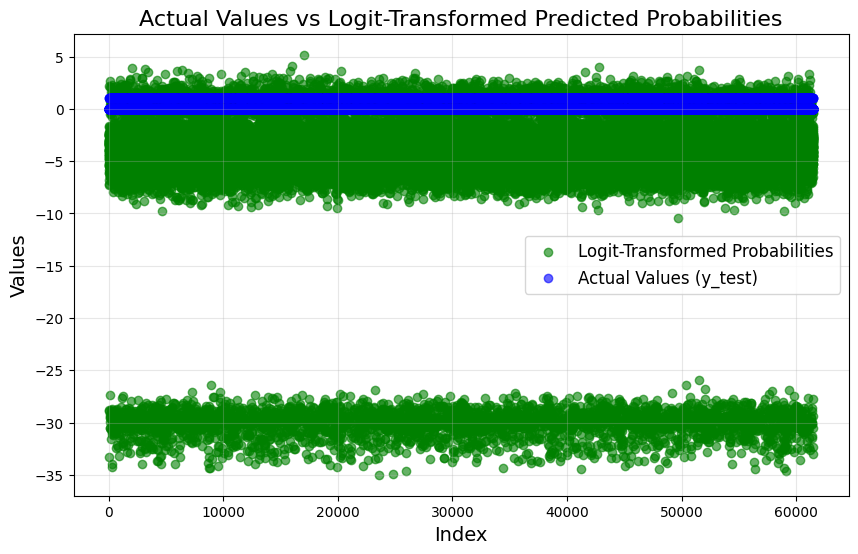

In [46]:
# prompt: logit transformation

# Logit transformation of predicted probabilities
logit_transformed_probabilities = np.log(pred_proba / (1 - pred_proba))

# Plotting the logit-transformed probabilities
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), logit_transformed_probabilities, color='green', alpha=0.6, label='Logit-Transformed Probabilities')
plt.scatter(np.arange(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Values (y_test)')

# Plot settings
plt.title('Actual Values vs Logit-Transformed Predicted Probabilities', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [47]:
y_test

,TARGET
245895,0
98194,0
36463,0
249923,0
158389,0
...,...
256564,0
278889,0
221828,0
190245,0


In [48]:
X_test

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,...,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EMERGENCYSTATE_MODE_UNK,EMERGENCYSTATE_MODE_Yes
245895,-0.779027,-0.388429,-0.013834,-0.124162,-0.798870,...,False,False,False,False,False
98194,0.326688,-1.008970,-0.013834,-0.124162,-0.237063,...,False,False,False,True,False
36463,1.474223,2.093732,-1.912958,-1.605835,-1.360678,...,False,False,False,False,False
249923,0.095234,-0.698700,1.885290,2.839183,-0.798870,...,False,False,False,False,False
158389,0.462604,-0.202267,-0.013834,-0.124162,0.886551,...,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
256564,-1.356219,-1.319240,-1.912958,-1.605835,-1.360678,...,False,False,False,True,False
278889,0.175269,0.852651,-0.013834,1.357510,-0.798870,...,False,False,False,True,False
221828,0.278739,0.852651,-0.013834,-0.124162,-0.237063,...,False,False,False,False,False
190245,-1.314399,-1.133078,-0.013834,-0.124162,-0.237063,...,False,False,False,False,False


In [49]:
prob_data_col_name = [col for col in final_data_df.columns if 'prob' in col or 'Probability' in col]
prob_data_col_name#'Prediction_Probability_pos_cash', 'Prediction_Probability'

['pred_proba_prev',
 'pred_proba_bur',
 'Prediction_Probability_pos_cash',
 'Prediction_Probability']

In [50]:
# final_data_df.columns.tolist()

In [51]:
res_data_col_name = [col for col in final_data_df.columns if 'residual' in col]
res_data_col_name

['residual_prev', 'residual_bur', 'residual_posh_cash', 'residual']

In [52]:

# Drop the redundant features from the dataset
prob_data_df = final_data_df.drop(columns=prob_data_col_name, errors='ignore')

In [53]:
# epsilon = 1e-8
# probabilities_transformed = np.log(probabilities / (1 - probabilities + epsilon))
# test_data['model1_prob'] = probabilities_transformed

In [54]:
# prompt: save logreg weights

import pickle

# Assuming 'logreg' is your trained Logistic Regression model
# Save the model weights
filename = 'logreg_weights.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [55]:
y_proba = logreg.predict_proba(X_test)[:, 1]

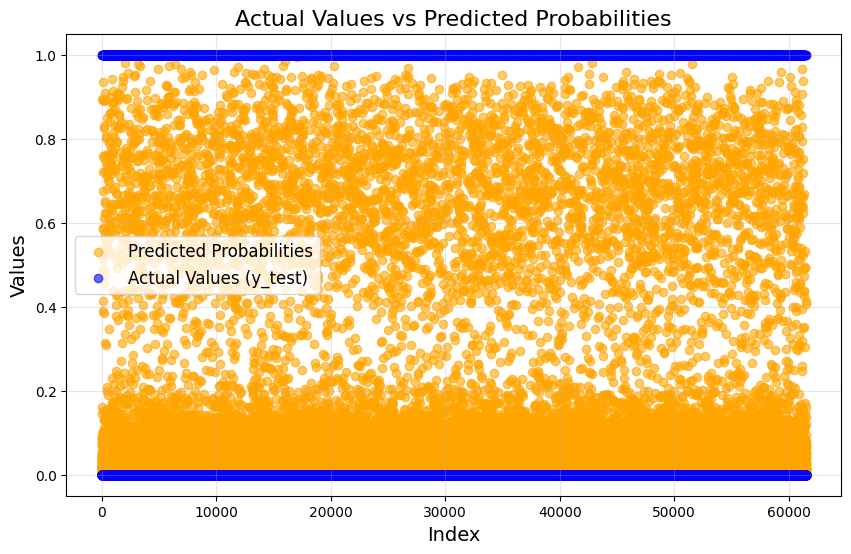

In [56]:
plt.figure(figsize=(10, 6))

plt.scatter(np.arange(len(y_test)), pred_proba, color='orange', alpha=0.6, label='Predicted Probabilities')
plt.scatter(np.arange(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Values (y_test)')

# Plot settings
plt.title('Actual Values vs Predicted Probabilities', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

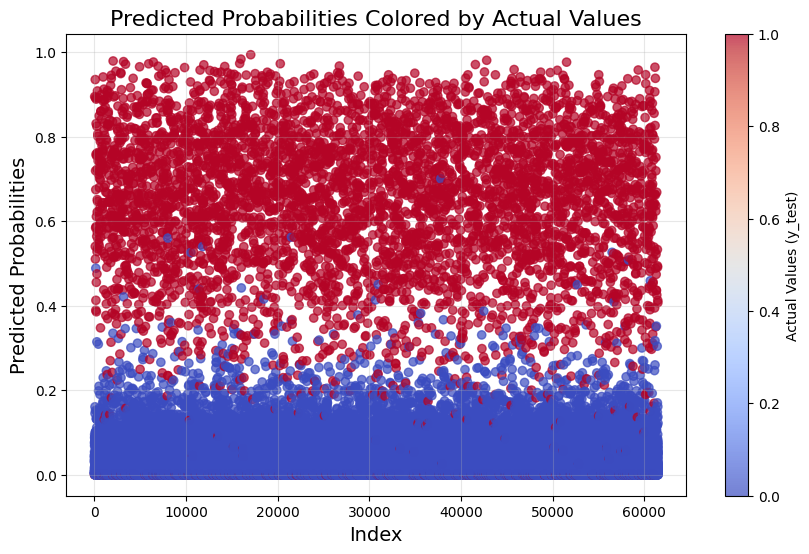

In [57]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    np.arange(len(pred_proba)),  # Use the index as x-axis
    pred_proba,                 # Use predicted probabilities as y-axis
    c=y_test,                   # Color points by the actual values
    cmap='coolwarm',            # Color map (red/blue for binary classification)
    alpha=0.7,                  # Transparency

)

# Add colorbar for clarity
plt.colorbar(scatter, label='Actual Values (y_test)')

# Plot settings
plt.title('Predicted Probabilities Colored by Actual Values', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Predicted Probabilities', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [58]:
# Sort the predicted probabilities and corresponding y_test
sorted_indices = np.argsort(pred_proba)
sorted_indices

array([23608, 24813, 59160, ..., 42797, 15985, 17049])

In [59]:
# # Sort the predicted probabilities and corresponding y_test
# sorted_indices = np.argsort(pred_proba)
sorted_pred_proba = pred_proba[sorted_indices]
sorted_y_test = y_test.iloc[sorted_indices] # Use iloc for positional indexing

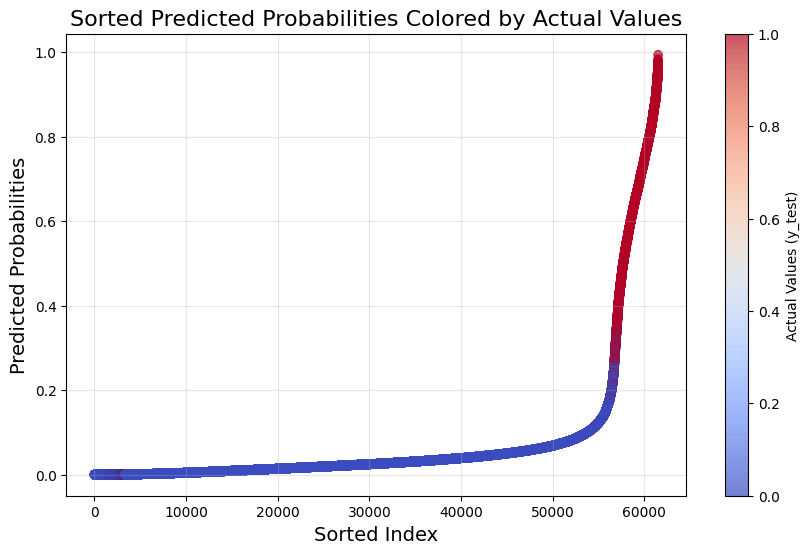

In [60]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    np.arange(len(sorted_pred_proba)),  # Use the index of sorted predictions as x-axis
    sorted_pred_proba,                 # Use sorted predicted probabilities as y-axis
    c=sorted_y_test,                   # Color points based on the sorted actual values
    cmap='coolwarm',                   # Color map (red/blue for binary classification)
    alpha=0.7,                         # Transparency
    # edgecolor='k'                      # Add a black border to points for better visibility
)

# Add colorbar for clarity
plt.colorbar(scatter, label='Actual Values (y_test)')

# Plot settings
plt.title('Sorted Predicted Probabilities Colored by Actual Values', fontsize=16)
plt.xlabel('Sorted Index', fontsize=14)
plt.ylabel('Predicted Probabilities', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [61]:
y_pred_proba

array([[1.1400506e-06],
       [6.7118281e-06],
       [9.5004916e-06],
       ...,
       [4.9786307e-03],
       [2.3021102e-02],
       [7.4286236e-06]], dtype=float32)

In [62]:
# need min max std and other
y_pred_proba.min(), y_pred_proba.max(), y_pred_proba.mean(), y_pred_proba.std()

(5.64166e-16, 1.0, 0.08826747, 0.2720274)

# Defining Risk Levels \( R1 \) through \( R6 \)

To define \( R1 \) through \( R6 \) based on the given probabilities, where \( R6 \) denotes the worst defaulter and \( R1 \) denotes the best borrower, we can use **min-max normalization** and **mean-standard deviation-based thresholds** to categorize probabilities into six risk levels. Here's how to proceed:

---

## Step 1: Normalize Probabilities Using Min-Max Scaling

The given range of probabilities is:
\[
\text{Min} = 0.00030964072, \quad \text{Max} = 1.0
\]

We can scale these probabilities to the range \([0, 1]\) using the formula:
\[
\text{Normalized Probability} = \frac{P - \text{Min}}{\text{Max} - \text{Min}}
\]

---

## Step 2: Define Risk Levels \( R1 \) to \( R6 \)

After normalization, divide the range \([0, 1]\) into six equal intervals and assign risk levels based on where the normalized probability falls.

### Example Thresholds (Equally Divided Range):
- \( R1 \): \([0.00 - 0.16]\)
- \( R2 \): \((0.16 - 0.33]\)
- \( R3 \): \((0.33 - 0.50]\)
- \( R4 \): \((0.50 - 0.66]\)
- \( R5 \): \((0.66 - 0.83]\)
- \( R6 \): \((0.83 - 1.00]\)

---

## Step 3: Mean and Standard Deviation Approach (Alternative)

Using the **mean** (\( $\mu$ \)) and **standard deviation** (\( $\sigma $)), you can define thresholds dynamically:

1. Compute the mean (\( $\mu$ \)) and standard deviation (\( $\sigma $)) of the probabilities.
2. Define the risk categories based on deviations from the mean.

### Example Thresholds:
- \( R1 \): \( P < $\mu$ - 2$\sigma $) (very low risk)
- \( R2 \): \( $\mu$ - 2$\sigma $leq P < $\mu$ - $\sigma $)
- \( R3 \): \( $\mu$ - $\sigma $leq P < $\mu$ \)
- \( R4 \): \( $\mu$ \leq P < $\mu$ + $\sigma $)
- \( R5 \): \( $\mu$ + $\sigma $leq P < $\mu$ + 2$\sigma $)
- \( R6 \): \( P \geq $\mu$ + 2$\sigma $) (worst defaulter)

---

### Notes:
- The **min-max normalization** approach works well for fixed intervals.
- The **mean-standard deviation** approach adjusts thresholds dynamically based on the distribution of probabilities.

Choose the method that best aligns with your data and use case.


In [63]:
quantiles = [0.10, 0.25, 0.50, 0.625, 0.85, 0.90]

# Calculate the quantiles using numpy.quantile()
quantile_values = np.quantile(y_pred_proba, quantiles)

# Print the results
for quantile, value in zip(quantiles, quantile_values):
    print(f"{quantile*100:.0f}th percentile: {value:.4f}")

10th percentile: 0.0000
25th percentile: 0.0000
50th percentile: 0.0001
62th percentile: 0.0005
85th percentile: 0.0181
90th percentile: 0.0978


In [64]:
# # Given statistics
# min_val = 0.00030964072
# max_val = 1.0
# mean = 0.1637866
# std = 0.25983065
quantile_values

array([1.04077381e-07, 3.13776525e-06, 1.01163016e-04, 4.87505225e-04,
       1.80884700e-02, 9.78121266e-02])

In [65]:
# Adjust thresholds to split the range into 6 equal intervals
adjusted_thresholds = quantile_values # 6 classes => 7 boundary points

# Assign risk levels (R1 to R6) based on the adjusted thresholds
risk_labels = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
risk_levels = np.digitize(y_pred_proba, adjusted_thresholds, right=True)
risk_levels = np.clip(risk_levels, 0, len(risk_labels) - 1)  # Ensure valid index range

# Map risk levels to labels
# Flatten risk_levels to a 1D array before using as index
assigned_risks = [risk_labels[level] for level in risk_levels.flatten()]

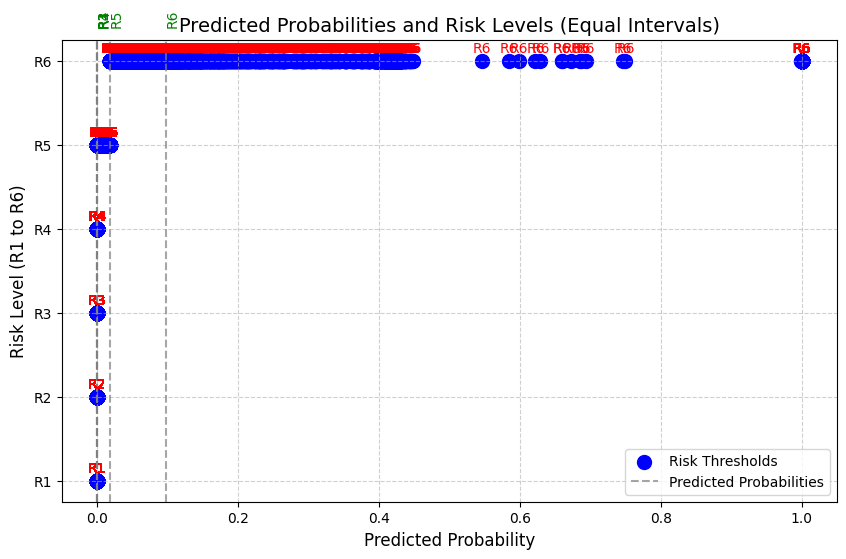

In [66]:
# Plot the probabilities with their assigned risk levels based on equal intervals
plt.figure(figsize=(10, 6))

# Scatter plot for probabilities and their risk levels
plt.scatter(y_pred_proba, risk_levels + 1, color='blue', label='Predicted Probabilities', s=100)

# Label each point with its risk level
for prob, level in zip(y_pred_proba, assigned_risks):
    plt.text(prob, risk_labels.index(level) + 1.1, f"{level}", fontsize=10, ha='center', color='red')

# Add threshold lines
for threshold, label in zip(adjusted_thresholds, risk_labels):
    plt.axvline(threshold, color='gray', linestyle='--', alpha=0.7)
    plt.text(threshold, 6.5, label, rotation=90, verticalalignment='center', color='green')

# Configure plot
plt.title("Predicted Probabilities and Risk Levels (Equal Intervals)", fontsize=14)
plt.xlabel("Predicted Probability", fontsize=12)
plt.ylabel("Risk Level (R1 to R6)", fontsize=12)
plt.yticks(range(1, 7), risk_labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(["Risk Thresholds", "Predicted Probabilities"])
plt.show()


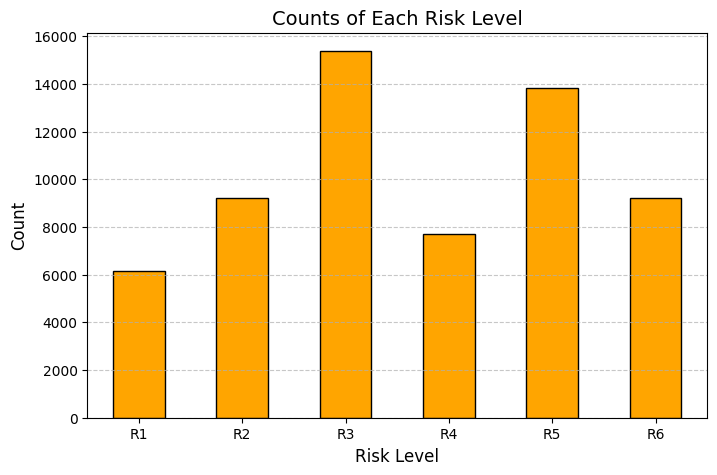

In [67]:
# Calculate the count of each risk level
risk_level_counts = pd.Series(assigned_risks).value_counts()

# Bar plot for the counts of each risk level
plt.figure(figsize=(8, 5))
risk_level_counts.sort_index().plot(kind="bar", color="orange", edgecolor="black")

# Customize the plot
plt.title("Counts of Each Risk Level", fontsize=14)
plt.xlabel("Risk Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [68]:
# here print the qunatiles


In [69]:
risk_level_counts

,count
R3,15376
R5,13838
R6,9226
R2,9225
R4,7687
R1,6151


In [70]:
# from scipy.spatial import ConvexHull
# # Calculate the convex hull
# hull = ConvexHull(final_data_df)

# # Plot the data and the hull
# plt.plot(final_data_df[:,0], final_data_df[:,1], 'o')
# for simplex in hull.simplices:
#     plt.plot(final_data_df[simplex, 0], final_data_df[simplex, 1], 'k-')

# plt.title('Convex Hull of Data')
# plt.show()

# # Check if all points are on the hull's boundary
# points_on_hull = set(hull.vertices)
# all_points = set(range(final_data_df.shape[0]))
# if points_on_hull == all_points:
#     print("Data is likely convex.")
# else:
#     print("Data is likely not convex.")

In [71]:
# Here  taking one random point from test_Data
random_index = np.random.randint(0, len(X_test))
random_data_point = X_test.iloc[random_index]
random_data_point

,42348
AMT_ANNUITY,1.322083
AMT_INCOME_TOTAL,0.976759
AMT_REQ_CREDIT_BUREAU_MON,1.88529
AMT_REQ_CREDIT_BUREAU_QRT,-0.124162
AMT_REQ_CREDIT_BUREAU_YEAR,0.886551
...,...
ORGANIZATION_TYPE_Transport: type 3,False
ORGANIZATION_TYPE_Transport: type 4,False
ORGANIZATION_TYPE_University,False
EMERGENCYSTATE_MODE_UNK,True


In [72]:
# pass it to logreg
pred_val = logreg.predict_proba(random_data_point.values.reshape(1, -1))
print(pred_val)

# Get the predicted risk level index (0 to 5) from pred_val
predicted_risk_level_index = np.argmax(pred_val)

# Access risk_labels using the integer index
print(risk_labels[predicted_risk_level_index])
#assign the value of risk band



[[0.94507818 0.05492182]]
R1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
random_index

58703

In [74]:
#get index of X_test
X_test.index[random_index]

42348

In [75]:
data_point_main_df = final_data_df.loc[X_test.index[random_index]]
data_point_main_df

,42348
AMT_ANNUITY,1.322083
AMT_CREDIT,0.582527
AMT_GOODS_PRICE,0.309179
AMT_INCOME_TOTAL,0.976759
AMT_REQ_CREDIT_BUREAU_DAY,0.395084
...,...
ORGANIZATION_TYPE_Transport: type 4,False
ORGANIZATION_TYPE_University,False
ORGANIZATION_TYPE_XNA,False
EMERGENCYSTATE_MODE_UNK,True


In [76]:
# get all proba features
prob_data_col_name = [col for col in final_data_df.columns if 'prob' in col or 'Probability' in col]
prob_data_col_name

['pred_proba_prev',
 'pred_proba_bur',
 'Prediction_Probability_pos_cash',
 'Prediction_Probability']

In [77]:
#get residual from pred_val
residual_data_col_name = [col for col in final_data_df.columns if 'residual' in col]
residual_data_col_name

['residual_prev', 'residual_bur', 'residual_posh_cash', 'residual']

In [78]:
#create mapping of proba blity with corresponding residula
prob_residual_dict = {}
for i in range(len(prob_data_col_name)):
    prob_residual_dict[prob_data_col_name[i]] = residual_data_col_name[i]
prob_residual_dict

{'pred_proba_prev': 'residual_prev',
 'pred_proba_bur': 'residual_bur',
 'Prediction_Probability_pos_cash': 'residual_posh_cash',
 'Prediction_Probability': 'residual'}

In [79]:
type(random_data_point)

pandas.core.series.Series

In [80]:
# print(random_data_point.index)  # For column names
print(random_data_point.index)    # For index names (if applicable)

Index(['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE',
       ...
       'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Trade: type 6',
       'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'EMERGENCYSTATE_MODE_UNK', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=188)


In [81]:
# Fetch the particular column value
# if residual_data_col_name in random_data_point.index:
column_values = random_data_point[residual_data_col_name]
#     print(column_values)
# else:
#     print(f"Column '{residual_data_col_name}' not found in random_data_point.")
column_values

,42348
residual_prev,-0.489125
residual_bur,-0.484219
residual_posh_cash,-0.51831
residual,-0.477625


In [82]:
data_point_main_df_val = data_point_main_df[prob_data_col_name]
data_point_main_df_val

,42348
pred_proba_prev,0.489125
pred_proba_bur,0.484219
Prediction_Probability_pos_cash,0.51831
Prediction_Probability,0.477625


In [83]:
# based on dictionary replace the values of random_data_point residual with data_point_main_df[prob_data_col_name]
for key, value in prob_residual_dict.items():
    random_data_point[value] = data_point_main_df_val[key]

<ipython-input-83-b846256926e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_data_point[value] = data_point_main_df_val[key]


In [84]:
# pass it to logreg
pred_val = logreg.predict_proba(random_data_point.values.reshape(1, -1))
print(pred_val)

# Get the predicted risk level index (0 to 5) from pred_val
predicted_risk_level_index = np.argmax(pred_val)

# Access risk_labels using the integer index
print(risk_labels[predicted_risk_level_index])
#assign the value of risk band

[[0.28883601 0.71116399]]
R2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [155]:
def func_normalize(row):
    # Iterate over each value in the row
    for col in row.index:
        row[col] = 2*row[col]-1
        # if 0 < row[col] < 0.5:
        #     row[col] = -row[col]  # Modify the row in-place
    return row  # Return the modified row


In [156]:
X_test_copy = X_test.copy()

In [157]:
# #here based on column values final_data_df substitute residual valuesin column with proba based on dictionary in X_test_copy
# for key, value in prob_residual_dict.items():
#     X_test_copy[value] = final_data_df[key].apply(func_normalize)
# X_test_copy

In [158]:
#now to normalize apply the func_normalize to all residual rows only to residual rows
X_test_copy[residual_data_col_name] = X_test_copy[residual_data_col_name].apply(func_normalize, axis=1)
# X_test_copy = X_test_copy.apply(func_normalize, axis=1)
# X_test_copy

In [166]:
#based on log reg model get prediction
pred_val = logreg.predict(X_test_copy)
#print classification report
print(classification_report(y_test, pred_val))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     56539
           1       1.00      0.41      0.58      4964

    accuracy                           0.95     61503
   macro avg       0.97      0.71      0.78     61503
weighted avg       0.95      0.95      0.94     61503



In [167]:
#confusion matrix
confusion_matrix(y_test, pred_val)

array([[56532,     7],
       [ 2916,  2048]])

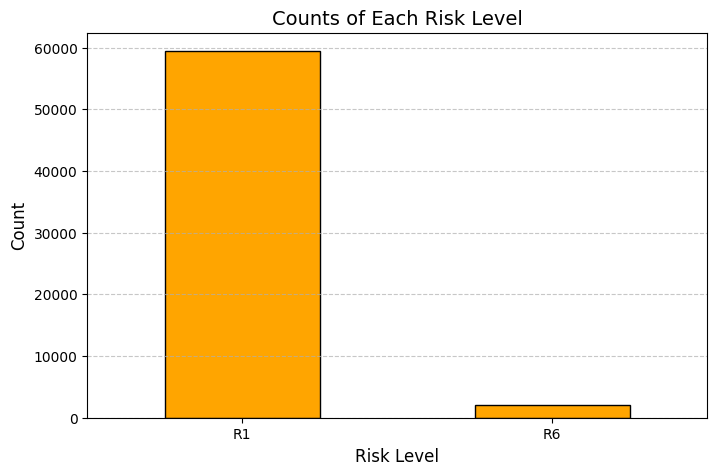

In [168]:
# Assign risk levels (R1 to R6) based on the adjusted thresholds
risk_labels = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
risk_levels = np.digitize(pred_val, adjusted_thresholds, right=True)
risk_levels = np.clip(risk_levels, 0, len(risk_labels) - 1)  # Ensure valid index range

# Map risk levels to labels
# Flatten risk_levels to a 1D array before using as index
assigned_risks = [risk_labels[level] for level in risk_levels.flatten()]
# Calculate the count of each risk level
risk_level_counts = pd.Series(assigned_risks).value_counts()

# Bar plot for the counts of each risk level
plt.figure(figsize=(8, 5))
risk_level_counts.sort_index().plot(kind="bar", color="orange", edgecolor="black")

# Customize the plot
plt.title("Counts of Each Risk Level", fontsize=14)
plt.xlabel("Risk Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [174]:
from tensorflow import keras

# Load the model
loaded_model = keras.models.load_model('best_model.keras', custom_objects={'CustomMetric': CustomMetric})


In [175]:
#based on neural netweork
pred_val = loaded_model.predict(X_test_copy)
#print classification report
pred_val

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[1.1400506e-06],
       [6.7118281e-06],
       [9.5004916e-06],
       ...,
       [4.9786307e-03],
       [2.3021102e-02],
       [7.4286236e-06]], dtype=float32)

In [176]:
pred_val_classes = (pred_val > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
print(classification_report(y_test, pred_val_classes))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     56539
           1       1.00      0.30      0.46      4964

    accuracy                           0.94     61503
   macro avg       0.97      0.65      0.71     61503
weighted avg       0.95      0.94      0.93     61503



In [177]:
# Assign risk levels (R1 to R6) based on the adjusted thresholds
risk_labels = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
risk_levels = np.digitize(pred_val, adjusted_thresholds, right=True)
risk_levels = np.clip(risk_levels, 0, len(risk_labels) - 1)  # Ensure valid index range

# Map risk levels to labels
# Flatten risk_levels to a 1D array before using as index
assigned_risks = [risk_labels[level] for level in risk_levels.flatten()]

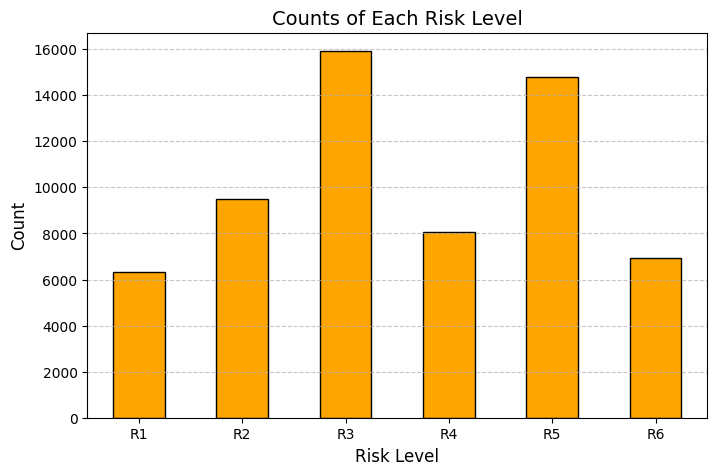

In [178]:
# Calculate the count of each risk level
risk_level_counts = pd.Series(assigned_risks).value_counts()

# Bar plot for the counts of each risk level
plt.figure(figsize=(8, 5))
risk_level_counts.sort_index().plot(kind="bar", color="orange", edgecolor="black")

# Customize the plot
plt.title("Counts of Each Risk Level", fontsize=14)
plt.xlabel("Risk Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
